In [5]:
# Install necessary libraries (uncomment if needed)
# !pip install pandas nltk scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

# Load dataset
df = pd.read_csv('flipitnews-data.csv')  # Replace with your dataset path
print("Dataset loaded successfully!")
print("First 5 rows:\n", df.head())

Dataset loaded successfully!
First 5 rows:
         Category                                            Article
0     Technology  tv future in the hands of viewers with home th...
1       Business  worldcom boss  left books alone  former worldc...
2         Sports  tigers wary of farrell  gamble  leicester say ...
3         Sports  yeading face newcastle in fa cup premiership s...
4  Entertainment  ocean s twelve raids box office ocean s twelve...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



--- Dataset Exploration ---
Shape of the dataset: (2225, 2)

Number of articles per category:
Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64


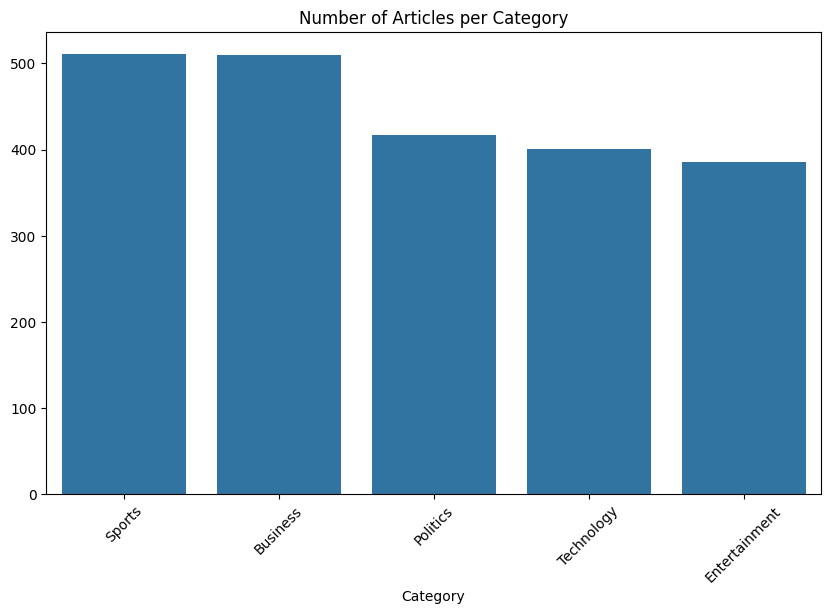

In [6]:
# Check dataset shape
print("\n--- Dataset Exploration ---")
print("Shape of the dataset:", df.shape)

# Check distribution of categories
category_counts = df['Category'].value_counts()
print("\nNumber of articles per category:")
print(category_counts)

# Plot category distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Articles per Category')
plt.xticks(rotation=45)
plt.show()

In [7]:
print("\n--- Text Processing ---")

def process_text(text):
    # Remove non-alphabetic characters
    text_clean = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text_clean = text_clean.lower()
    # Tokenize
    tokens = word_tokenize(text_clean)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    return ' '.join(tokens)

# Process a sample article
sample_article = df['Article'][0]
print("\nOriginal Article (Sample):\n", sample_article)
print("\nProcessed Article (Sample):\n", process_text(sample_article))

# Apply processing to all articles
df['Processed_Article'] = df['Article'].apply(process_text)
print("\nText processing completed for all articles!")


--- Text Processing ---

Original Article (Sample):
 tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more 

In [9]:
print("\n--- Encoding & Vectorization ---")

# Encode target variable
le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['Category'])
print("Target variable encoded!")

# Let user choose vectorization method
vector_choice = input("\nChoose vectorization method (1: Bag of Words, 2: TF-IDF): ").strip()

if vector_choice == '1':
    vectorizer = CountVectorizer(max_features=5000)  # Limit features for efficiency
    print("Using Bag of Words vectorization.")
elif vector_choice == '2':
    vectorizer = TfidfVectorizer(max_features=5000)
    print("Using TF-IDF vectorization.")
else:
    print("Invalid choice. Defaulting to Bag of Words.")
    vectorizer = CountVectorizer(max_features=5000)

# Vectorize text data
X = vectorizer.fit_transform(df['Processed_Article'])
y = df['Category_Encoded']

# Train-test split (75:25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)


--- Encoding & Vectorization ---
Target variable encoded!

Choose vectorization method (1: Bag of Words, 2: TF-IDF): 2
Using TF-IDF vectorization.

Train shape: (1668, 5000)
Test shape: (557, 5000)



--- Naive Bayes Model ---
Accuracy: 0.9694793536804309
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       136
           1       1.00      0.93      0.96        96
           2       0.92      0.98      0.95        98
           3       0.98      1.00      0.99       124
           4       0.97      0.98      0.98       103

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557



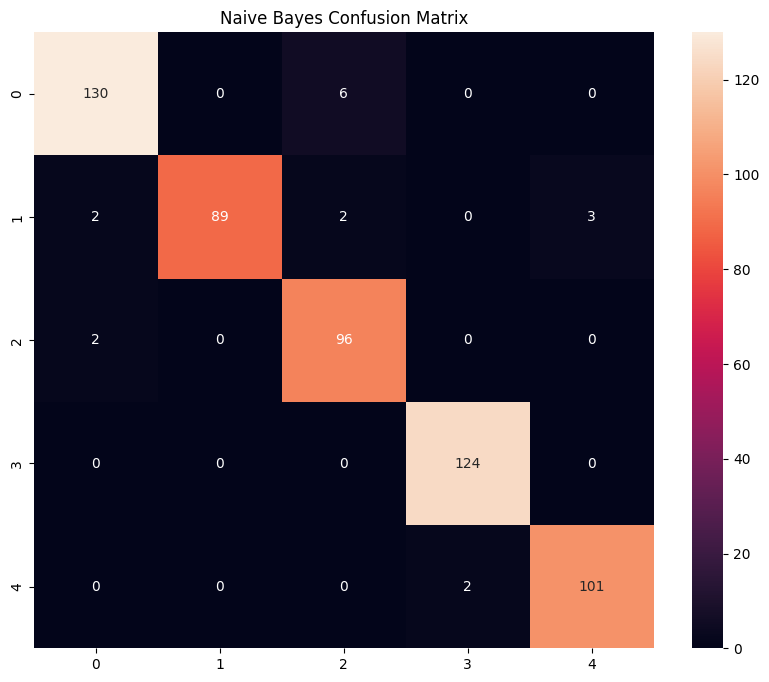

In [10]:
print("\n--- Naive Bayes Model ---")
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


--- Training Additional Models ---

Model: DecisionTreeClassifier
Accuracy: 0.8043087971274686
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       136
           1       0.80      0.77      0.79        96
           2       0.78      0.78      0.78        98
           3       0.83      0.90      0.86       124
           4       0.82      0.76      0.79       103

    accuracy                           0.80       557
   macro avg       0.80      0.80      0.80       557
weighted avg       0.80      0.80      0.80       557



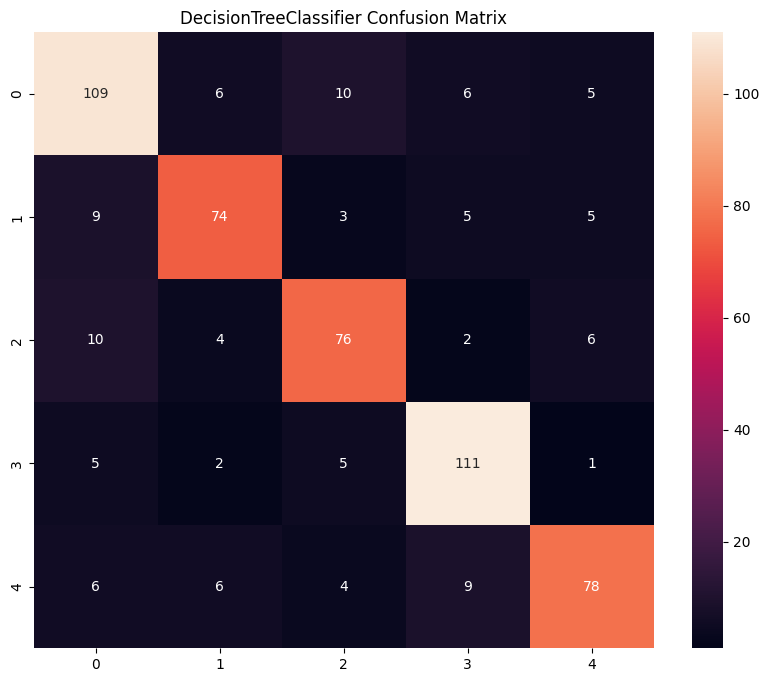


Model: KNeighborsClassifier
Accuracy: 0.9389587073608617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       136
           1       0.95      0.95      0.95        96
           2       0.85      0.90      0.88        98
           3       0.97      1.00      0.98       124
           4       0.97      0.96      0.97       103

    accuracy                           0.94       557
   macro avg       0.94      0.94      0.94       557
weighted avg       0.94      0.94      0.94       557



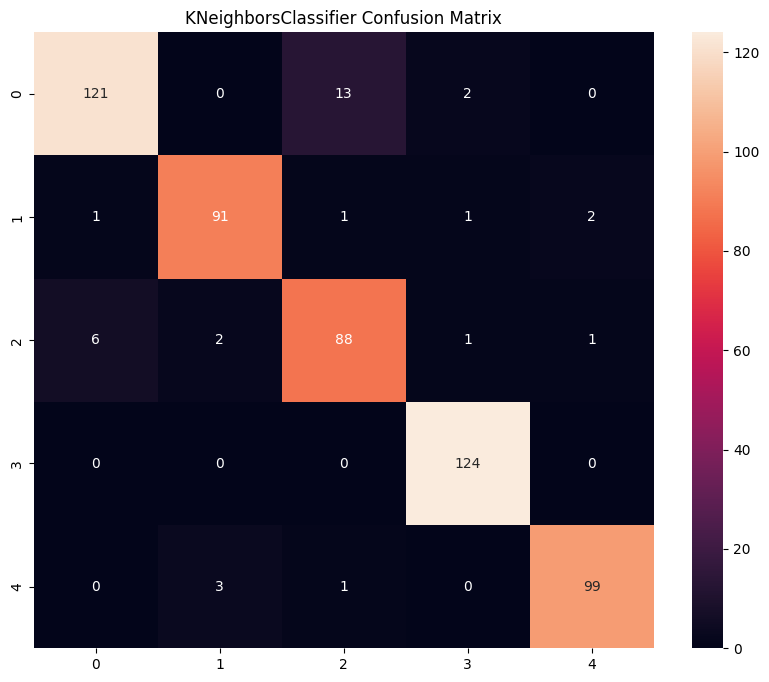


Model: RandomForestClassifier
Accuracy: 0.9425493716337523
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       136
           1       0.97      0.93      0.95        96
           2       0.94      0.93      0.93        98
           3       0.95      0.98      0.96       124
           4       0.97      0.91      0.94       103

    accuracy                           0.94       557
   macro avg       0.95      0.94      0.94       557
weighted avg       0.94      0.94      0.94       557



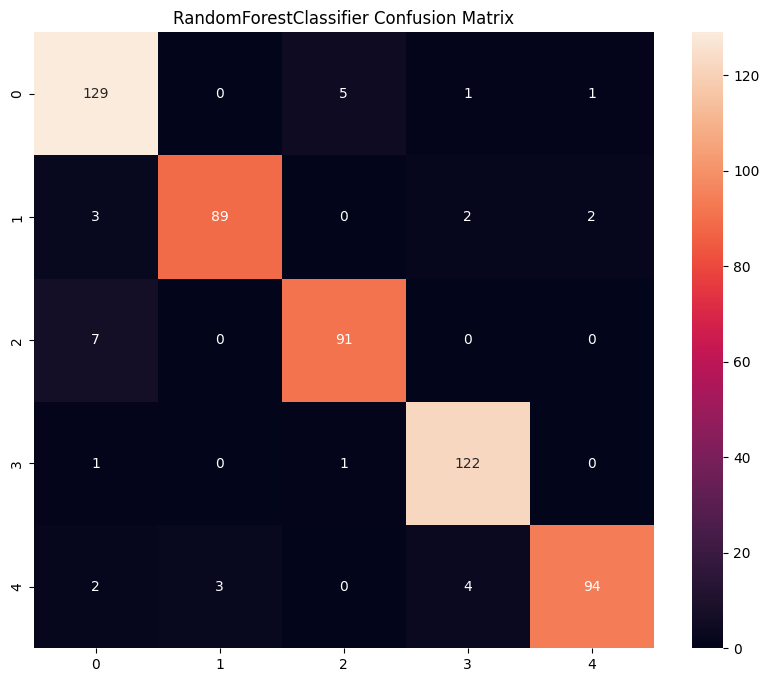

In [11]:
print("\n--- Training Additional Models ---")

def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    # Confusion Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title(f'{model.__class__.__name__} Confusion Matrix')
    plt.show()

# List of models
models = [
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_neighbors=5),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

# Train and evaluate each model
for model in models:
    train_evaluate_model(model, X_train, X_test, y_train, y_test)


Evaluating Naive Bayes

MultinomialNB Results:
Accuracy: 0.9695
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       136
           1       1.00      0.93      0.96        96
           2       0.92      0.98      0.95        98
           3       0.98      1.00      0.99       124
           4       0.97      0.98      0.98       103

    accuracy                           0.97       557
   macro avg       0.97      0.97      0.97       557
weighted avg       0.97      0.97      0.97       557



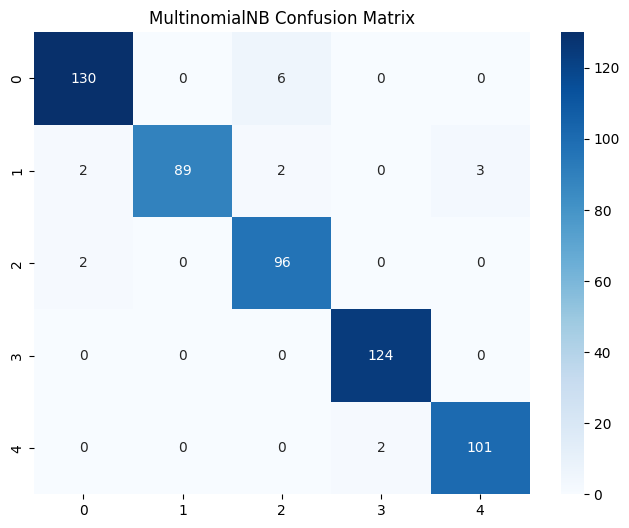


Evaluating Decision Tree

DecisionTreeClassifier Results:
Accuracy: 0.8043
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       136
           1       0.80      0.77      0.79        96
           2       0.78      0.78      0.78        98
           3       0.83      0.90      0.86       124
           4       0.82      0.76      0.79       103

    accuracy                           0.80       557
   macro avg       0.80      0.80      0.80       557
weighted avg       0.80      0.80      0.80       557



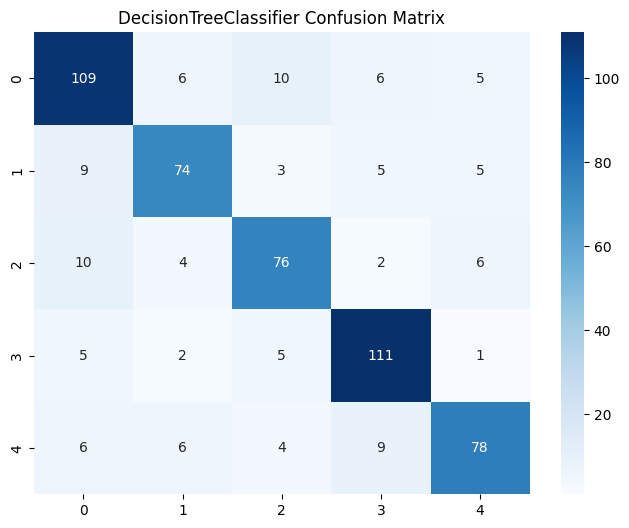


Evaluating K-Neighbors

KNeighborsClassifier Results:
Accuracy: 0.9390
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       136
           1       0.95      0.95      0.95        96
           2       0.85      0.90      0.88        98
           3       0.97      1.00      0.98       124
           4       0.97      0.96      0.97       103

    accuracy                           0.94       557
   macro avg       0.94      0.94      0.94       557
weighted avg       0.94      0.94      0.94       557



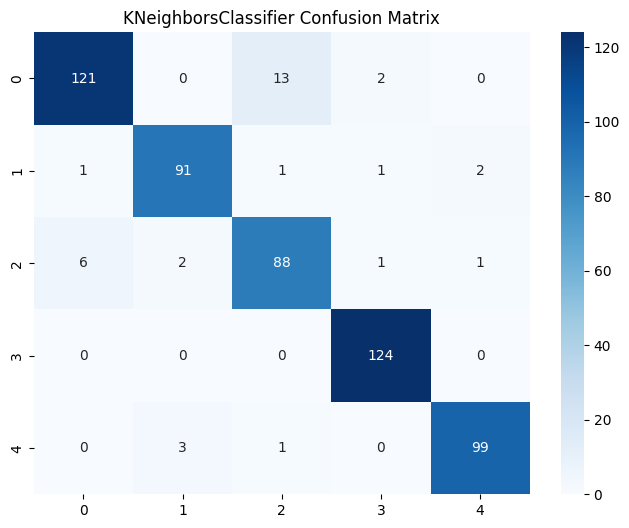


Evaluating Random Forest

RandomForestClassifier Results:
Accuracy: 0.9425
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       136
           1       0.97      0.93      0.95        96
           2       0.94      0.93      0.93        98
           3       0.95      0.98      0.96       124
           4       0.97      0.91      0.94       103

    accuracy                           0.94       557
   macro avg       0.95      0.94      0.94       557
weighted avg       0.94      0.94      0.94       557



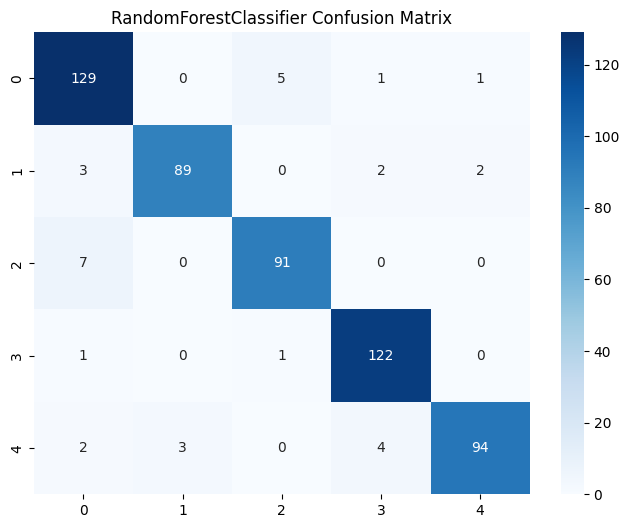

In [12]:
# Initialize models
models = {
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{model.__class__.__name__} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.show()

# Train and evaluate all models
for name, model in models.items():
    print(f"\n{'='*40}\nEvaluating {name}")
    evaluate_model(model, X_train, X_test, y_train, y_test)